In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('derivative_pricing_data.csv', parse_dates=['Date'])


                                Date  Strike_Price  Underlying_Price  \
count                           1566   1566.000000       1566.000000   
mean   2017-12-31 21:35:37.931034624     99.916954         99.897101   
min              2015-01-01 00:00:00     50.463202         50.001163   
25%              2016-07-01 18:00:00     73.833137         75.513548   
50%              2018-01-01 12:00:00    100.656174        100.159517   
75%              2019-07-02 18:00:00    125.321280        124.830656   
max              2020-12-31 00:00:00    149.971767        149.834751   
std                              NaN     29.334625         28.976285   

        Volatility  Time_to_Maturity  Risk_Free_Rate   Option_Price  
count  1566.000000       1566.000000     1566.000000   1.566000e+03  
mean      0.297738          1.036782        0.029653   2.209664e+01  
min       0.100012          0.100431        0.010010  7.280970e-119  
25%       0.198420          0.553878        0.019881   1.808635e+00  
5

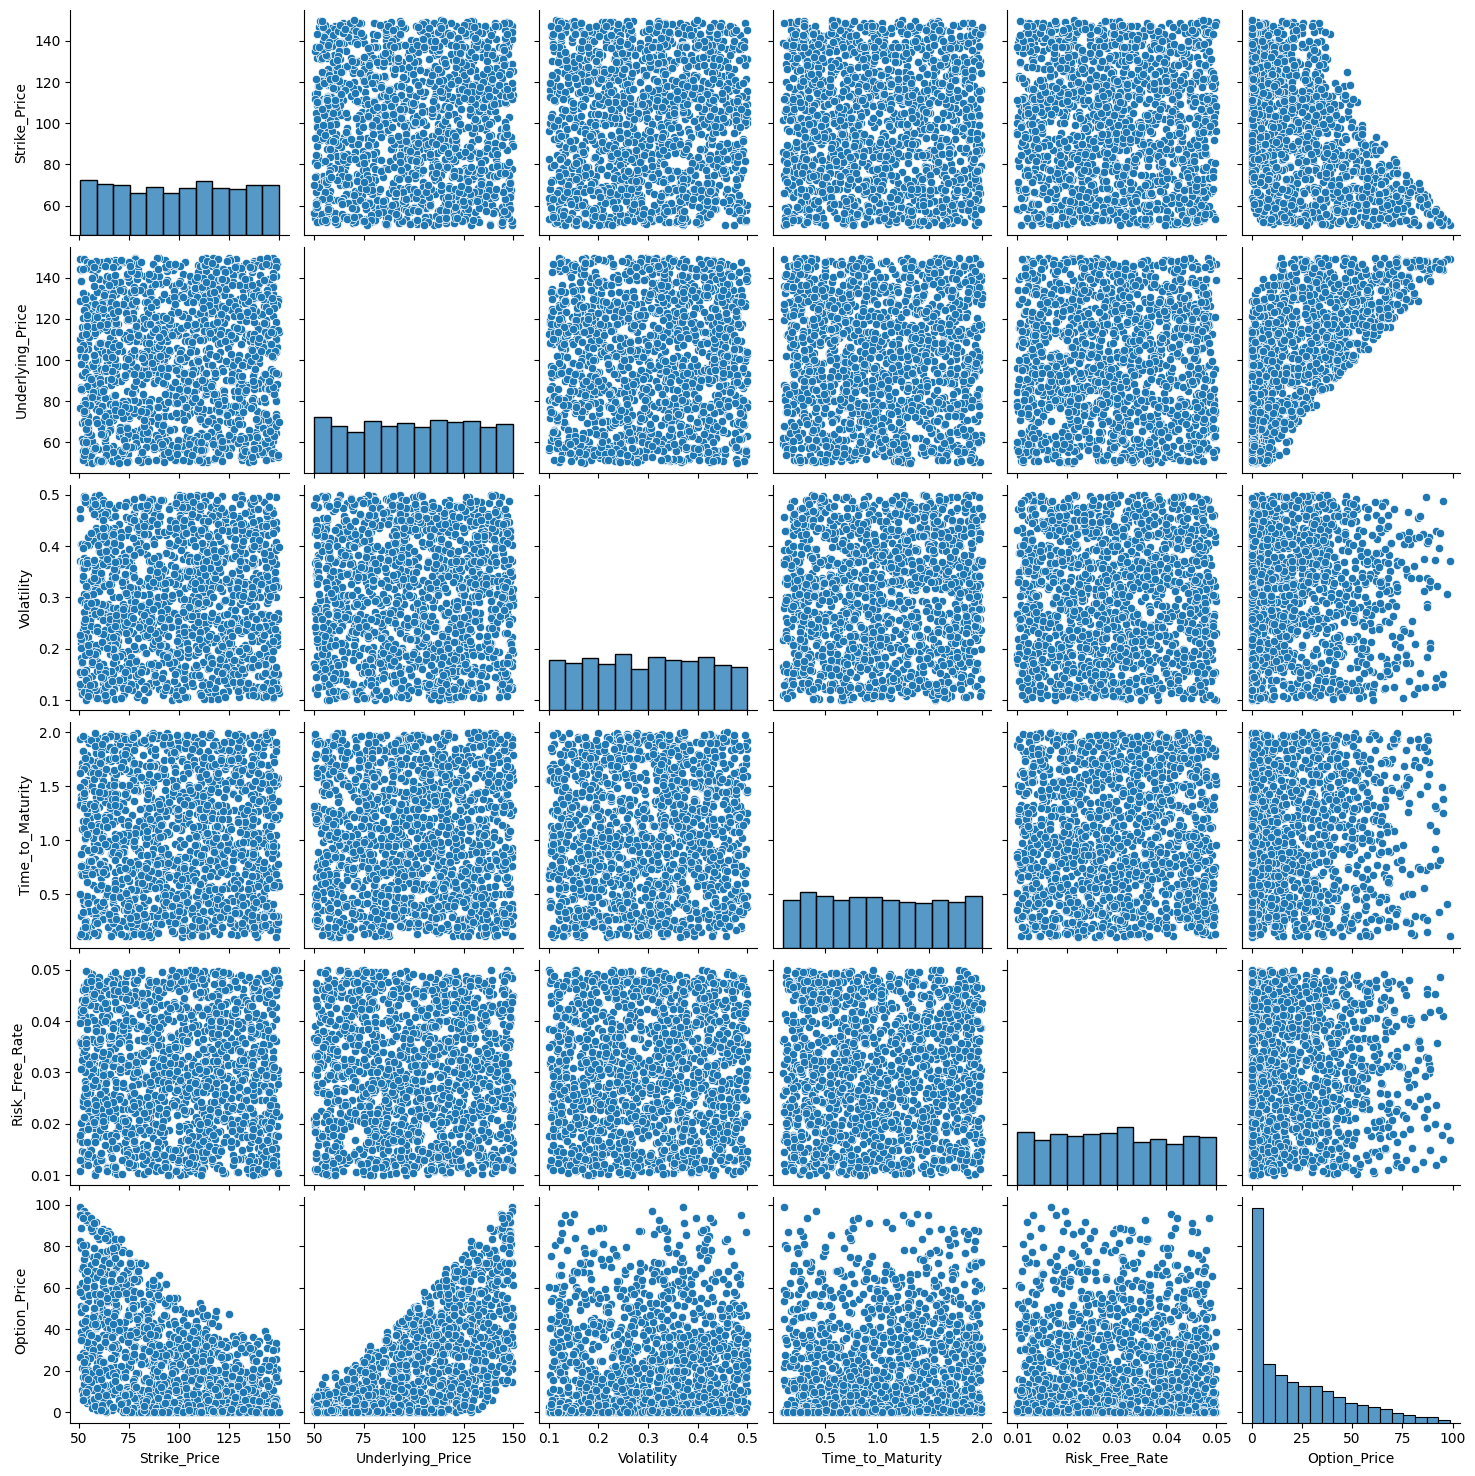

In [3]:
# EDA
print(data.describe())
sns.pairplot(data.drop(columns=['Date']))
plt.show()

# Scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Date']))

# Prepare data for training
X = data_scaled[:, :-1]
y = data_scaled[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# LSTM
model_lstm = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
32/32 [==============================] - 8s 67ms/step - loss: 0.0617 - mae: 0.1994 - val_loss: 0.0489 - val_mae: 0.1741
Epoch 2/50
32/32 [==============================] - 1s 21ms/step - loss: 0.0565 - mae: 0.1949 - val_loss: 0.0488 - val_mae: 0.1813
Epoch 3/50
32/32 [==============================] - 1s 19ms/step - loss: 0.0562 - mae: 0.1931 - val_loss: 0.0506 - val_mae: 0.1912
Epoch 4/50
32/32 [==============================] - 1s 17ms/step - loss: 0.0558 - mae: 0.1932 - val_loss: 0.0523 - val_mae: 0.1976
Epoch 5/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0542 - mae: 0.1921 - val_loss: 0.0453 - val_mae: 0.1693
Epoch 6/50
32/32 [==============================] - 0s 13ms/step - loss: 0.0520 - mae: 0.1855 - val_loss: 0.0427 - val_mae: 0.1721
Epoch 7/50
32/32 [==============================] - 0s 14ms/step - loss: 0.0439 - mae: 0.1676 - val_loss: 0.0393 - val_mae: 0.1669
Epoch 8/50
32/32 [==============================] - 0s 12ms/step - loss: 0.0384 - m

In [5]:
# GRU
model_gru = Sequential([
    GRU(50, input_shape=(X_train.shape[1], 1), return_sequences=True),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
32/32 [==============================] - 6s 36ms/step - loss: 0.0623 - mae: 0.2018 - val_loss: 0.0475 - val_mae: 0.1787
Epoch 2/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0559 - mae: 0.1937 - val_loss: 0.0470 - val_mae: 0.1777
Epoch 3/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0544 - mae: 0.1916 - val_loss: 0.0471 - val_mae: 0.1813
Epoch 4/50
32/32 [==============================] - 0s 9ms/step - loss: 0.0530 - mae: 0.1874 - val_loss: 0.0445 - val_mae: 0.1717
Epoch 5/50
32/32 [==============================] - 0s 10ms/step - loss: 0.0499 - mae: 0.1798 - val_loss: 0.0383 - val_mae: 0.1529
Epoch 6/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0404 - mae: 0.1546 - val_loss: 0.0260 - val_mae: 0.1176
Epoch 7/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0264 - mae: 0.1256 - val_loss: 0.0166 - val_mae: 0.0931
Epoch 8/50
32/32 [==============================] - 0s 11ms/step - loss: 0.0206 - ma

In [6]:
# DNN
model_dnn = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
model_dnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model_dnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
32/32 [==============================] - 1s 11ms/step - loss: 0.0485 - mae: 0.1671 - val_loss: 0.0110 - val_mae: 0.0742
Epoch 2/50
32/32 [==============================] - 0s 8ms/step - loss: 0.0161 - mae: 0.0962 - val_loss: 0.0040 - val_mae: 0.0486
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0086 - mae: 0.0690 - val_loss: 0.0018 - val_mae: 0.0325
Epoch 4/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0068 - mae: 0.0597 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 5/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0054 - mae: 0.0539 - val_loss: 0.0012 - val_mae: 0.0253
Epoch 6/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0054 - mae: 0.0522 - val_loss: 0.0015 - val_mae: 0.0292
Epoch 7/50
32/32 [==============================] - 0s 6ms/step - loss: 0.0041 - mae: 0.0462 - val_loss: 8.4544e-04 - val_mae: 0.0233
Epoch 8/50
32/32 [==============================] - 0s 7ms/step - loss: 0.0035 - mae:

In [7]:
# Evaluate models
mse_lstm, mae_lstm = model_lstm.evaluate(X_test, y_test)
mse_gru, mae_gru = model_gru.evaluate(X_test, y_test)
mse_dnn, mae_dnn = model_dnn.evaluate(X_test, y_test)

print(f'LSTM - MSE: {mse_lstm}, MAE: {mae_lstm}')
print(f'GRU - MSE: {mse_gru}, MAE: {mae_gru}')
print(f'DNN - MSE: {mse_dnn}, MAE: {mae_dnn}')

10/10 [==============================] - 0s 2ms/step - loss: 3.3512e-04 - mae: 0.0146
LSTM - MSE: 0.0025226911529898643, MAE: 0.03963790461421013
GRU - MSE: 0.001110236975364387, MAE: 0.028233975172042847
DNN - MSE: 0.00033512176014482975, MAE: 0.01461887639015913


In [8]:
# Predict
y_pred_lstm = model_lstm.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_dnn = model_dnn.predict(X_test)

10/10 [==============================] - 0s 3ms/step
